# Case study on Unsupervised Learning
**Sreehari P S**<br>
*NORKA B5*
***

Do the following in the wine dataset.<br>
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./datasets/Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [3]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No Null values are present

In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Normalize
***

In [8]:
from sklearn.preprocessing import Normalizer
data = pd.DataFrame(Normalizer().fit_transform(df), columns=df.columns)
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


### 1. KMeans Clustering
***

In [11]:
from sklearn.cluster import KMeans

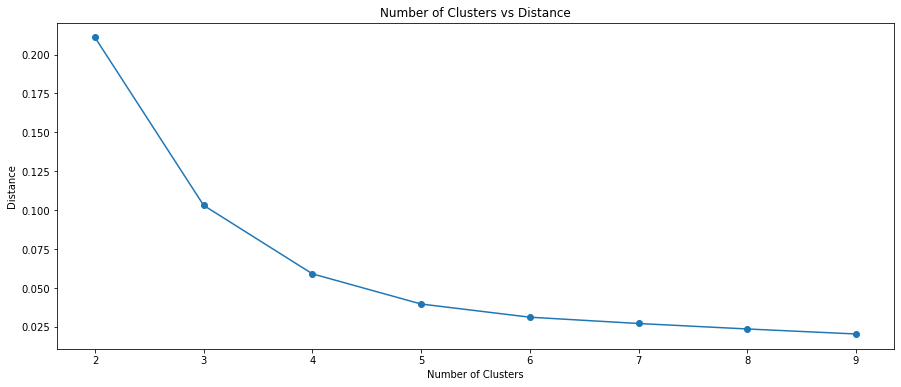

In [30]:
# Finding optimal clusters using Elbow diagram
kpoints = range(2,10)
inertias = []
for k in kpoints:
    inertias.append(KMeans(n_clusters=k, init = "k-means++", random_state=42).fit(data).inertia_)
plt.figure(figsize = (15, 6))
plt.plot(kpoints, inertias, "-o")
plt.title("Number of Clusters vs Distance")
plt.xlabel("Number of Clusters")
plt.ylabel("Distance")
plt.show()

Optimal k = 5

In [32]:
model_kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=42)
model_kmeans.fit(data)
kmean_clusters = model_kmeans.labels_

In [33]:
kmean_clusters

array([1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 1, 0, 1, 0, 4, 1,
       3, 3, 1, 0, 1, 0, 3, 1, 1, 0, 0, 0, 3, 0, 4, 1, 1, 3, 3, 0, 3, 3,
       1, 1, 3, 3, 3, 4, 4, 3, 0, 0, 1, 0, 1, 3, 0, 0, 1, 4, 3, 3, 4, 1,
       3, 4, 3, 0, 0, 0, 3, 4, 0, 3, 3, 4, 4, 0, 0, 0, 0, 0, 4, 1, 3, 0,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 0, 1, 1, 0, 0, 0, 4, 1,
       3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 3])

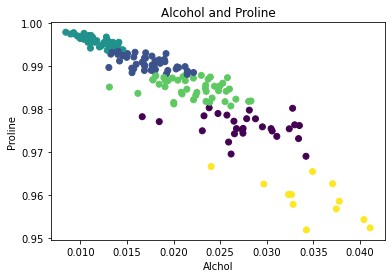

In [43]:
plt.title("Alcohol and Proline")
plt.scatter(data["Alcohol"], data["Proline"], c = kmean_clusters)
plt.xlabel("Alchol")
plt.ylabel("Proline")
plt.show()

### 2. Agglomerative Clustering
***

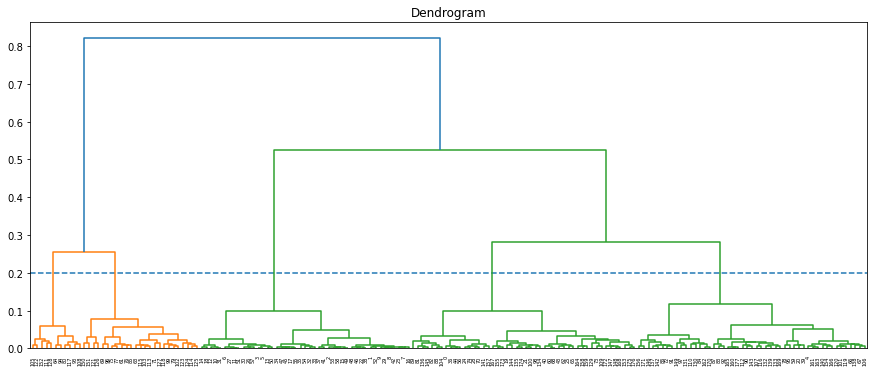

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (15, 6))
plt.title("Dendrogram")
plt.hlines(0.2, 0, 5000, linestyles="dashed")
dend = dendrogram(linkage(data, method = "ward"))

Optimal k = 5

In [48]:
from sklearn.cluster import AgglomerativeClustering
model_ag = AgglomerativeClustering(n_clusters= 5, affinity= "euclidean", linkage = "ward").fit(data)
ag_clusters = model_ag.labels_

In [49]:
ag_clusters

array([1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 3, 1, 3, 4, 1,
       0, 0, 1, 3, 1, 3, 0, 1, 1, 3, 3, 3, 0, 3, 4, 1, 1, 0, 0, 3, 0, 0,
       1, 1, 0, 0, 0, 4, 4, 0, 3, 0, 1, 3, 1, 0, 3, 3, 1, 4, 0, 0, 4, 1,
       0, 4, 0, 3, 3, 3, 0, 4, 3, 0, 0, 3, 4, 3, 3, 3, 3, 3, 4, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 3, 3, 4, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0], dtype=int64)

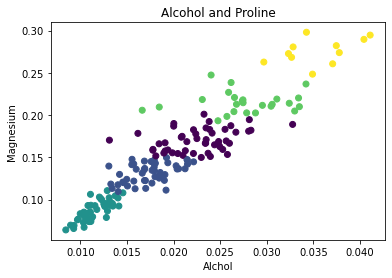

In [50]:
plt.title("Alcohol and Proline")
plt.scatter(data["Alcohol"], data["Magnesium"], c = ag_clusters)
plt.xlabel("Alchol")
plt.ylabel("Magnesium")
plt.show()

## Result
***

The wine dataset can be divided into 5 clusters
***